<a href="https://colab.research.google.com/github/sebas-sv/temperature-neural-network/blob/master/Temperature_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
print("Training...")
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Training completed!")

Training...
Training completed!


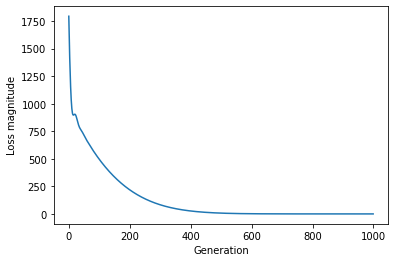

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Generation")
plt.ylabel("Loss magnitude")
plt.plot(history.history["loss"])

In [ ]:
test = 25.0
resultado = model.predict([test])
print(str(test) + " degrees Celsius is... " + str(resultado) + " degrees Fahrenheit")

25.0 degrees Celsius is... [[76.882355]] degrees Fahrenheit


In [ ]:
print("Internal model variables:")
print(layer.get_weights())

Internal model variables:
[array([[1.7981527]], dtype=float32), array([31.928535], dtype=float32)]
